# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904418492
verification code:  fb445f5b3a68
======================================================================


```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2731 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1000,2025-11-11 06:00:00,Downtown,104,1.0,3.15,Cash,False
1,1002,2025-11-11 06:18:00,Suburb,114,1.0,5.12,Credit,True
2,1003,2025-11-11 06:52:00,Campus,111,1.0,2.95,Credit,False
3,1001,2025-11-11 06:55:00,Downtown,104,1.0,2.70,Credit,False
4,1014,2025-11-11 07:01:00,Suburb,111,1.0,3.28,Credit,True


In [5]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [6]:
# Task 1: use isna(), nunique(), min/max on timestamp

missing_sales = sales.isna().sum()
missing_products = products.isna().sum()
print('Columnwise missing values in the datasets:\n')
print(f'Sales Dataset:\n{missing_sales}\n')
print(f'Products Dataset:\n{missing_products}')
print()

#2. Unique product investigation
unique_product_sales = sales['product_id'].nunique()
unique_product_catalog = products['product_id'].nunique()
catelog_size = len(sales)
print(f'Number of unique product IDs in the sales data: {unique_product_sales}')
print(f'Number of unique products in the products catalog: {unique_product_catalog}')
print('Sales data contains some additonal product ID that are not avaialble in product catalog.')
print()

#3. Date range
earliest = sales['timestamp'].min()
latest = sales['timestamp'].max()
print(f'Transaction date ranged from  {earliest} to {latest}')

Columnwise missing values in the datasets:

Sales Dataset:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          7
revenue           2
payment_method    0
loyalty_member    0
dtype: int64

Products Dataset:
product_id    0
name          0
category      0
cost          0
dtype: int64

Number of unique product IDs in the sales data: 21
Number of unique products in the products catalog: 18
Sales data contains some additonal product ID that are not avaialble in product catalog.

Transaction date ranged from  2025-11-11 06:00:00 to 2025-11-24 21:48:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [7]:
# Task 2: use pd.merge() with appropriate join type
merged = pd.merge(sales, products, on='product_id', how='left')
print('Merged datset (1st 5 rows):\n')
merged.head()


Merged datset (1st 5 rows):



,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1000,2025-11-11 06:00:00,Downtown,104,1.0,3.15,Cash,False,Americano,Coffee,1.0
1,1002,2025-11-11 06:18:00,Suburb,114,1.0,5.12,Credit,True,Cinnamon Roll,Pastry,1.4
2,1003,2025-11-11 06:52:00,Campus,111,1.0,2.95,Credit,False,Croissant,Pastry,1.0
3,1001,2025-11-11 06:55:00,Downtown,104,1.0,2.70,Credit,False,Americano,Coffee,1.0
4,1014,2025-11-11 07:01:00,Suburb,111,1.0,3.28,Credit,True,Croissant,Pastry,1.0


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [9]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
#1. Comparing shape of the merged DataFrame to the original sales data
print(f'Original sales dataset shape: {sales.shape}')
print(f'Merged dataset shape: {merged.shape}')
#Merged dataset should have same number of rows but 3 additional columns. Printing a check:
if (sales.shape[0]==merged.shape[0])&(sales.shape[1]==merged.shape[1]-3):
    print('Three additional columns added to the sales dataset and number of rows reamined the same.')
else:
    print('Improper merge. Check again!')
print()

#2. Missing value check in product columns (name, category, cost): all missing
missing_prod_col = merged[['name','category','cost']].isna().sum()
print('Missing values in product columns:\nColumn\tMissing Values')
print(missing_prod_col)
print()

#3. Identifying product_id(s) causing the problem
missing_rows = merged[merged[['name','category','cost']].isna().any(axis=1)]
problematic_ids = missing_rows['product_id'].unique()
print(f'problems IDs are:\n{problematic_ids}')

Original sales dataset shape: (2731, 8)
Merged dataset shape: (2731, 11)
Three additional columns added to the sales dataset and number of rows reamined the same.

Missing values in product columns:
Column	Missing Values
name        14
category    14
cost        14
dtype: int64

problems IDs are:
[199 200 201]


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [6]:
# Task 4: create profit column, then groupby with .agg()
# Removing transactions with missing product info
merged_clean = merged.dropna(subset=['name','category','cost']).copy()

#profit for each transaction
merged_clean['profit'] = merged_clean['revenue'] - merged_clean['cost'] * merged_clean['quantity']

#profit by category
profit_categorywise = ( merged_clean
    .groupby('category')
    .agg({
        'profit': 'sum',
        'transaction_id': 'count'
    })
    .rename(columns = {
        'profit' : 'total_profit',
        'transaction_id' : 'transaction_count'
    })
    .sort_values('total_profit',ascending = False)
                      )
print(f'Profit by category:\n{profit_categorywise}')

Profit by category:
          total_profit  transaction_count
category                                 
Sandwich       4545.78                642
Coffee         2294.78                947
Pastry         1517.48                517
Tea             897.86                613


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [7]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
profit_caterory_location = ( merged_clean
                             .groupby(['category','location'])
                             .agg({
                                 'profit': ['sum','mean'],
                                 'transaction_id':'count'
                             })
                           )
profit_caterory_location.columns = ['total_profit','average_profit','transaction_count']  #renaming the columns
profit_caterory_location = profit_caterory_location.reset_index()
                           
print(f'Profit by category and location:\n{profit_caterory_location.to_string(index=False)}')  #index column is hidded by using .to_string method

Profit by category and location:
category location  total_profit  average_profit  transaction_count
  Coffee   Campus       1007.98        1.980314                511
  Coffee Downtown       1091.75        3.032639                362
  Coffee   Suburb        195.05        2.635811                 74
  Pastry   Campus        623.90        2.610460                240
  Pastry Downtown        568.00        3.463415                164
  Pastry   Suburb        325.58        2.906964                113
Sandwich   Campus        736.04        5.333623                138
Sandwich Downtown       2962.46        8.094153                368
Sandwich   Suburb        847.28        6.230000                136
     Tea   Campus        203.80        1.227711                167
     Tea Downtown        302.26        1.809940                167
     Tea   Suburb        391.80        1.404301                279


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

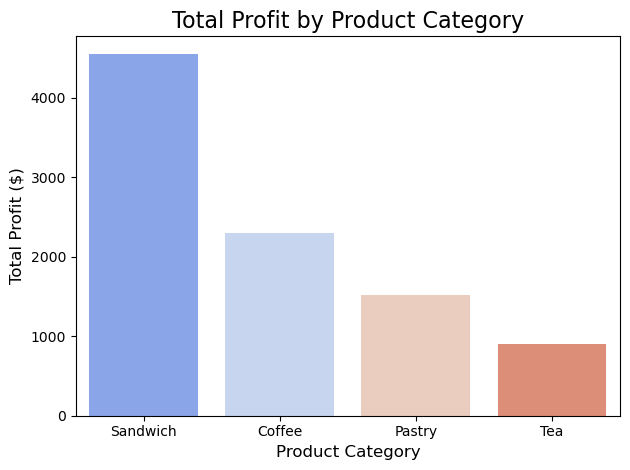

In [8]:
# Task 6: use sns.barplot() with aggregated data
plot = profit_categorywise.reset_index()
sns.barplot(
    data=plot,
    x='category',
    y='total_profit',
    hue='category', 
    palette='coolwarm'
)
plt.title('Total Profit by Product Category', fontsize = 16)
plt.xlabel('Product Category', fontsize =12)
plt.ylabel('Total Profit ($)', fontsize =12)

plt.tight_layout()
plt.show()
            

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

**1. Importance of verifying merge (Task 3):**  
Verifying the merge was critical because the merged dataset initially had missing product information for 14 transactions. If we had proceeded without addressing this, profit calculations for these transactions would have been inaccurate.  

**2. Aggregation at different levels (Tasks 4 and 5):**
- Aggregating **by category** allowed us to see overall profitability trends across product types. For example, Sandwiches generated the highest total profit (4,545.78), followed by Coffee (2,294.78), Pastry (1,517.48), and Tea (897.86).  
- Aggregating **by category and location** revealed a more detailed view that profitability varies by store. For example, Sandwiches are most profitable at Downtown (2,962.46 total profit), while Coffee performs better at Campus (1,007.98) and Downtown (1,091.75).

**3. Patterns and insights discovered:**  
- Sandwiches dominate profitability, although it had fewer transactions than Coffee.  
- Downtown store drives the most profit overall, particularly for Sandwiches.  
- Premium items (Sandwiches and Pastries at Downtown) generate the highest margins.

**4. Recommendation for improving profitability:**  
- Focus should be given on **Sandwich sales at the Downtown store**, which contributed 2,962.46 in total profit and averages 8.09 per transaction.  
- Actionable steps: Ensure sufficient inventory of popular Sandwich items.  

**5. Additional analysis suggested:**  
- Investigating **sales by time of day** to optimize staffing and promotions.  
- Analyze **loyalty member behavior** to determine whether loyalty incentives improve profit per transaction.  

## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

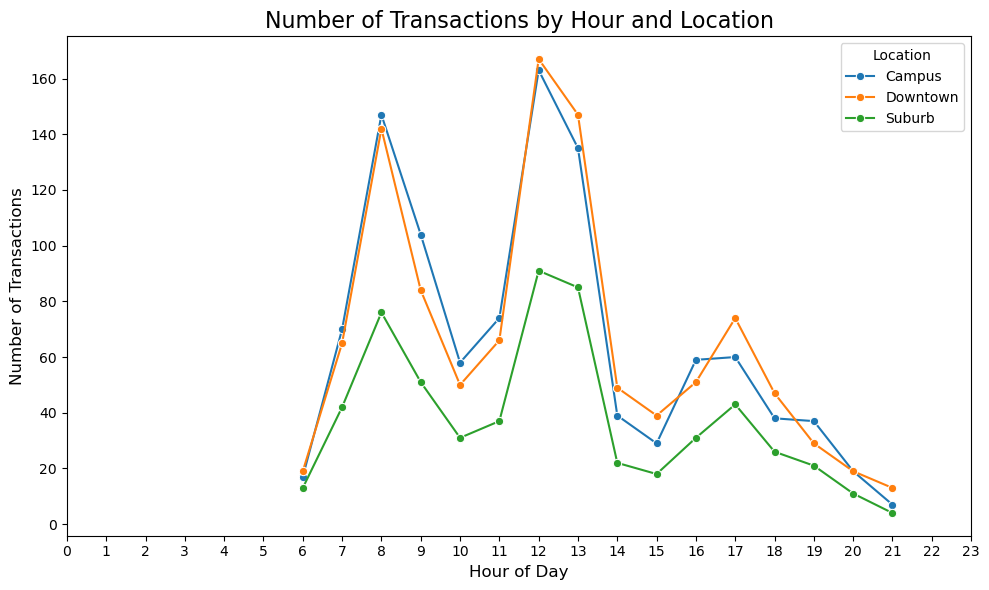

In [9]:
# Bonus: Your time-based analysis here
# Busiest hours at each location?

# Extracting hour from timestamp
merged_clean['hour'] = merged_clean['timestamp'].dt.hour

# Count number of transactions by hour and location
hourly_transactions = ( merged_clean
        .groupby(['location', 'hour'])
        .agg({'transaction_id': 'count'})
        .rename( columns = {'transaction_id' : 'transaction_count'})
        .reset_index()
)


plt.figure(figsize=(10,6))
sns.lineplot(
    data=hourly_transactions,
    x='hour',
    y='transaction_count',
    hue='location',
    marker='o'
)

plt.title("Number of Transactions by Hour and Location", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="Location")
plt.tight_layout()
plt.show()


### Your Findings

## Bonus: Time-Based Analysis

**Question:** Which hours of the day are busiest at each store location?

**Findings:**  
- All three locations experience their highest transaction volumes during the early morning (around 8 AM) and lunchtime (around 12 PM). These peaks suggest that breakfast and lunch times are the busiest periods at each store location.


## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.